In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_row',1000)

# 导入美国年度失业率数据
unemploy = pd.read_csv('timeseries/data/unemployment.csv')
unemploy.head()

,year,rate
0,1955,4.383333
1,1956,4.141667
2,1957,4.258333
3,1958,6.800000
4,1959,5.475000


In [52]:
# 构建一列随机缺失值列
unemploy['missing'] = unemploy['rate']
unemploy.head()

,year,rate,missing
0,1955,4.383333,4.383333
1,1956,4.141667,4.141667
2,1957,4.258333,4.258333
3,1958,6.800000,6.800000
4,1959,5.475000,5.475000


In [53]:
# 随机选择10%行手动填充缺失值
# frac:抽取行的比例
# random_stat:随机数发生器种子
mis_index = unemploy.sample(frac=0.1,random_state=999).index
unemploy.loc[mis_index,'missing']=None
unemploy.head()

,year,rate,missing
0,1955,4.383333,4.383333
1,1956,4.141667,4.141667
2,1957,4.258333,4.258333
3,1958,6.800000,6.800000
4,1959,5.475000,5.475000


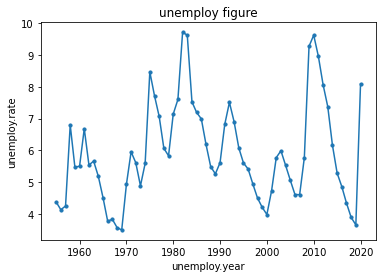

In [54]:
plt.title('unemploy figure')  
plt.xlabel('unemploy.year')
plt.ylabel('unemploy.rate')  
plt.scatter(unemploy.year,unemploy.rate,s=10)
plt.plot(unemploy.year,unemploy.rate,label='real')

In [56]:
# 使用 forward fill填补缺失值
# 缺失值之前出现的最近一个时间点的数值来填补缺失
unemploy['f_fill'] = unemploy['missing']
unemploy['f_fill'].ffill(inplace=True)
unemploy.head()

,year,rate,missing,f_fill
0,1955,4.383333,4.383333,4.383333
1,1956,4.141667,4.141667,4.141667
2,1957,4.258333,4.258333,4.258333
3,1958,6.800000,6.800000,6.800000
4,1959,5.475000,5.475000,5.475000


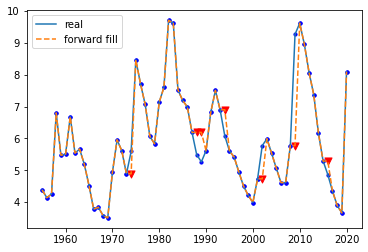

In [61]:
plt.scatter(unemploy.year,unemploy.rate,s=10,c='b')
plt.plot(unemploy.year,unemploy.rate,label='real')
# 前向填充法数据图
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].f_fill,s=10,c='b')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].f_fill,s=50,c='r',marker='v')
plt.plot(unemploy.year,unemploy.f_fill,linestyle='--',label='forward fill')
plt.legend()

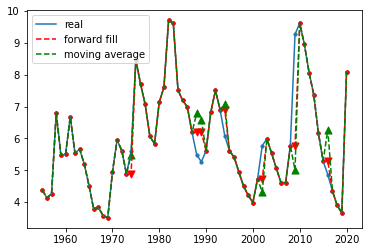

In [62]:
# 使用Moving average填充数据
# mean()：取平均数
unemploy['moveavg']=np.where(unemploy['missing'].isnull(),
                             unemploy['missing'].shift(1).rolling(3,min_periods=1).mean(),
                             unemploy['missing'])
# 观察填充效果
plt.scatter(unemploy.year,unemploy.rate,s=10)
plt.plot(unemploy.year,unemploy.rate,label='real')
# forward fill
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].f_fill,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].f_fill,s=50,c='r',marker='v')
plt.plot(unemploy.year,unemploy.f_fill,label='forward fill',c='r',linestyle = '--')
# moving average
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].moveavg,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].moveavg,s=50,c='g',marker='^')
plt.plot(unemploy.year,unemploy.moveavg,label='moving average',c='g',linestyle = '--')
plt.legend()

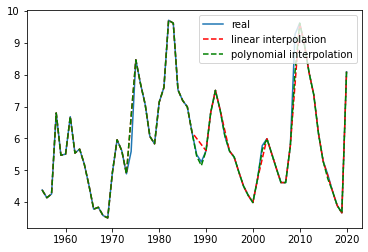

In [63]:
# 尝试线性插值和多项式插值
unemploy['inter_lin']=unemploy['missing'].interpolate(method='linear')
unemploy['inter_poly']=unemploy['missing'].interpolate(method='polynomial', order=3)
# 观察填充效果
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.plot(unemploy.year,unemploy.inter_lin,label='linear interpolation',c='r',linestyle = '--')
plt.plot(unemploy.year,unemploy.inter_poly,label='polynomial interpolation',c='g',linestyle = '--')
plt.legend()

In [67]:
air = pd.read_csv('timeseries/data/air.csv')
air.head()

,Date,Passengers
0,1949/1,112
1,1949/2,118
2,1949/3,132
3,1949/4,129
4,1949/5,121


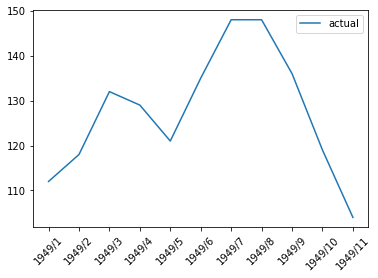

In [68]:
plt.plot(air.Date,air.Passengers,label='actual')
plt.xticks(rotation=45)
plt.legend()

In [69]:
# 设置两种平滑系数
# mean()：求平均数
air['smooth_0.5']= air.Passengers.ewm(alpha =0.5).mean()
air['smooth_0.9']= air.Passengers.ewm(alpha =0.9).mean()
air.head()

,Date,Passengers,smooth_0.5,smooth_0.9
0,1949/1,112,112.000000,112.000000
1,1949/2,118,116.000000,117.454545
2,1949/3,132,125.142857,130.558559
3,1949/4,129,127.200000,129.155716
4,1949/5,121,124.000000,121.815498


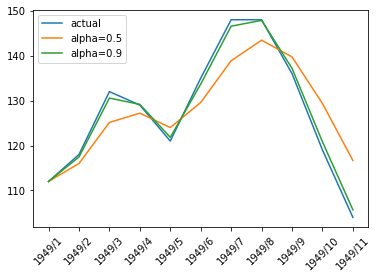

In [70]:
plt.plot(air.Date,air.Passengers,label='actual')
plt.plot(air.Date,air['smooth_0.5'],label='alpha=0.5')
plt.plot(air.Date,air['smooth_0.9'],label='alpha=0.9')
plt.xticks(rotation=45)
plt.legend()